# Data Analysis

This notebook contains statistical tests and detailed analysis of the dataset.

## 1. Statistical Tests

Perform hypothesis testing and correlation analysis.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Load the processed data
data = pd.read_csv('Sleep_Data_Analysis_guncel.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Correlation between TikTok logins and sleep quality
pearson_corr, _ = pearsonr(data['TikTok_Login_Count'], data['Sleep_Quality'])
spearman_corr, _ = spearmanr(data['TikTok_Login_Count'], data['Sleep_Quality'])

print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")


Pearson Correlation: -0.7100680975680619
Spearman Correlation: -0.7487058282643738


## 2. Hypothesis Testing

Test the effect of exam days on sleep quality.

In [ ]:
# Group data by exam day
exam_day_sleep = data[data['Exam_Day'] == 1]['Sleep_Quality']
non_exam_day_sleep = data[data['Exam_Day'] == 0]['Sleep_Quality']

# T-test
t_stat, p_value = ttest_ind(exam_day_sleep, non_exam_day_sleep)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -6.856664302000577, P-value: 6.122283650513573e-10


Summary Statistics:
                      count       mean        std   min        25%        50%  \
TikTok_Login_Count    101.0   0.362376   0.225304   0.0   0.184615   0.307692   
Sleep_Quality         101.0  86.044554   8.752457  58.5  80.000000  88.000000   
Step_Count            101.0   0.514145   0.309540   0.0   0.241788   0.526922   
TikTok_Message_Count  101.0  23.326733  14.385485   0.0  12.000000  21.000000   
Exam_Day              101.0   0.108911   0.313081   0.0   0.000000   0.000000   

                            75%   max  
TikTok_Login_Count     0.476923   1.0  
Sleep_Quality         93.000000  99.5  
Step_Count             0.804267   1.0  
TikTok_Message_Count  34.000000  49.0  
Exam_Day               0.000000   1.0  


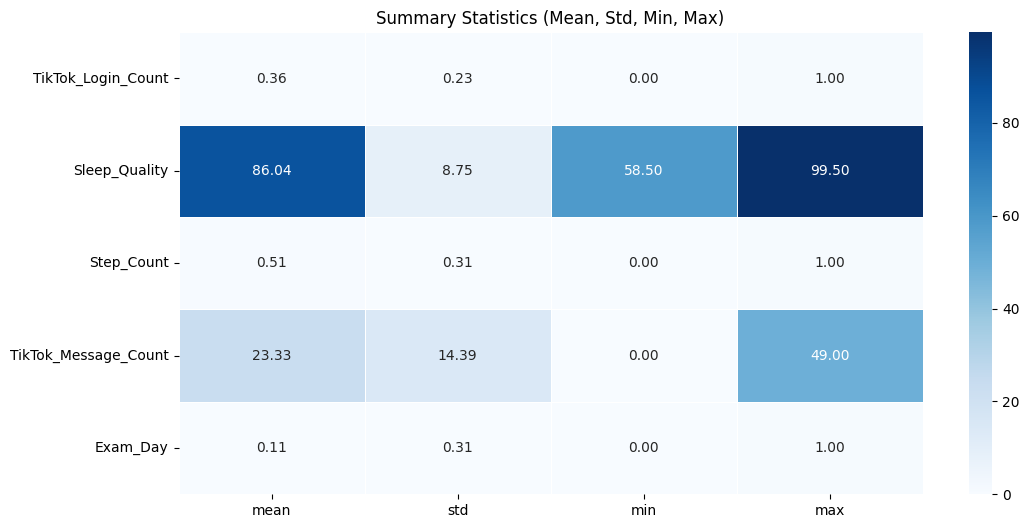

In [ ]:
# Özet istatistikleri hesaplama
summary_stats = data.describe().transpose()

# Özet istatistikleri göster
print("Summary Statistics:")
print(summary_stats)

# Özet istatistikleri bir görsel olarak göstermek için heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(summary_stats[['mean', 'std', 'min', 'max']], annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)
plt.title("Summary Statistics (Mean, Std, Min, Max)")
plt.show()

# Data Processing

This notebook handles data cleaning, preparation, and initial transformations.

## 1. Imports and Functions

Import libraries and define reusable functions.

In [ ]:

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to process date column
def process_date_column(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df

# Function to normalize a column (min-max scaling)
def normalize_column(df, column_name):
    df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
    return df


## 2. Load Dataset

Load the raw dataset for analysis.

In [ ]:

# Load the dataset
data = pd.read_csv('Sleep_Data_Analysis_guncel.csv')

# Display the first few rows
print("Raw Data:")
data.head()


Raw Data:


,Date,TikTok_Login_Count,Sleep_Quality,Step_Count,TikTok_Message_Count,Exam_Day
0,2024-10-02,0.169231,94.5,0.209843,19,0
1,2024-10-03,0.123077,96.0,0.460549,36,0
2,2024-10-04,0.169231,94.5,0.788125,9,0
3,2024-10-05,0.169231,94.5,0.313015,29,0
4,2024-10-06,0.538462,82.5,0.003499,48,0


## 3. Data Cleaning

Handle missing values, incorrect formats, and outliers.

In [ ]:

# Handle missing values by filling or dropping
data.fillna({'TikTok_Login_Count': 0, 'TikTok_Message_Count': 0}, inplace=True)

# Convert date column to datetime format
data = process_date_column(data, 'Date')

# Remove rows with unrealistic sleep quality (<0 or >100)
data = data[(data['Sleep_Quality'] >= 0) & (data['Sleep_Quality'] <= 100)]

# Display cleaned data summary
print("Cleaned Data:")
data.info()


Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  101 non-null    datetime64[ns]
 1   TikTok_Login_Count    101 non-null    float64       
 2   Sleep_Quality         101 non-null    float64       
 3   Step_Count            101 non-null    float64       
 4   TikTok_Message_Count  101 non-null    int64         
 5   Exam_Day              101 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 4.9 KB


## 4. Feature Engineering

Create additional columns and normalize data.

In [ ]:

# Normalize numerical columns
data = normalize_column(data, 'TikTok_Login_Count')
data = normalize_column(data, 'Step_Count')


# Save the processed data
data.to_csv('Sleep_Data_Analysis_guncel.csv', index=False)
print("Processed data saved as 'Sleep_Data_Analysis_guncel.csv'.")


Processed data saved as 'Sleep_Data_Analysis_guncel.csv'.


# Data Visualization

This notebook contains EDA and visualizations to explore the dataset.

## 1. Imports

Load libraries required for visualizations.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Load the processed data
data = pd.read_csv('Sleep_Data_Analysis_guncel.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])


## 2. Univariate Analysis

Visualize the distribution of individual variables.

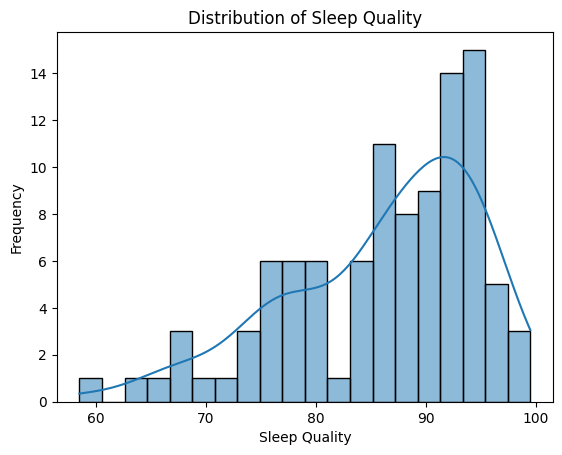

In [ ]:

# Distribution of Sleep Quality
sns.histplot(data['Sleep_Quality'], bins=20, kde=True)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()


## 3. Time-Series Analysis

Explore trends in sleep quality and step count over time.

In [ ]:

# Line plot for sleep quality over time
alt.Chart(data).mark_line().encode(
    x='Date:T',
    y='Sleep_Quality:Q',
    tooltip=['Date', 'Sleep_Quality']
).properties(title='Sleep Quality Over Time').interactive()


alt.Chart(...)

## 4. Correlation Analysis

Analyze relationships between variables.

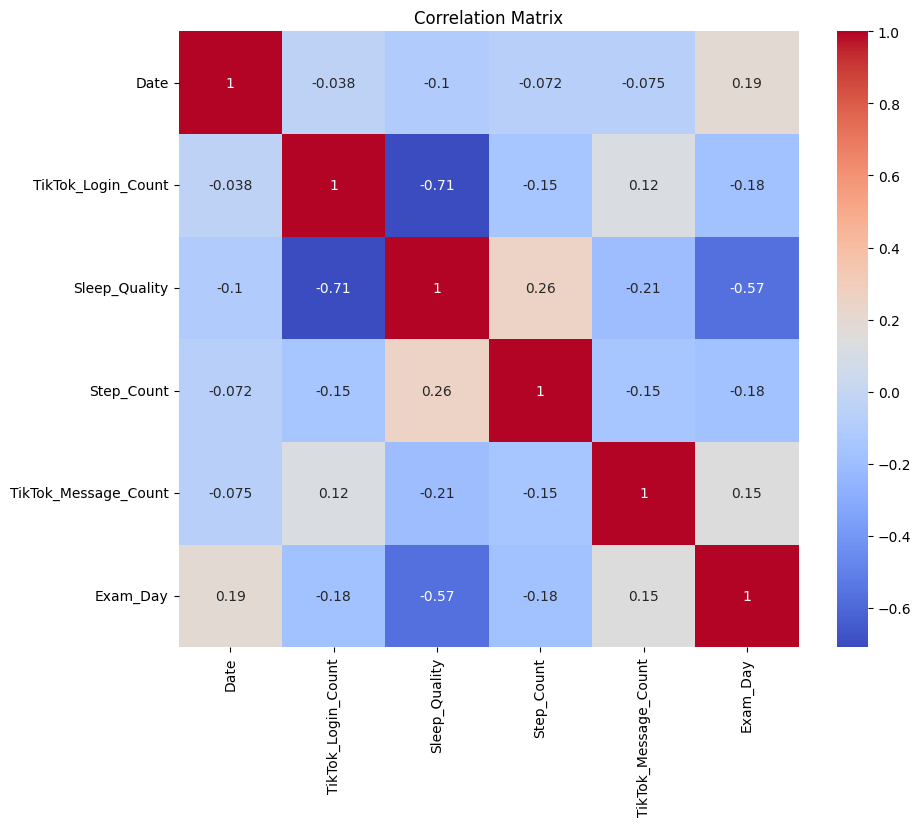

In [ ]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleyin ve tarih sütununu dönüştürün
data = pd.read_csv("Sleep_Data_Analysis_guncel.csv")
data['Date'] = pd.to_datetime(data['Date'])

# İlk birkaç satırı görüntüleyin
data.head()

,Date,TikTok_Login_Count,Sleep_Quality,Step_Count,TikTok_Message_Count,Exam_Day
0,2024-10-02,0.169231,94.5,0.209843,19,0
1,2024-10-03,0.123077,96.0,0.460549,36,0
2,2024-10-04,0.169231,94.5,0.788125,9,0
3,2024-10-05,0.169231,94.5,0.313015,29,0
4,2024-10-06,0.538462,82.5,0.003499,48,0


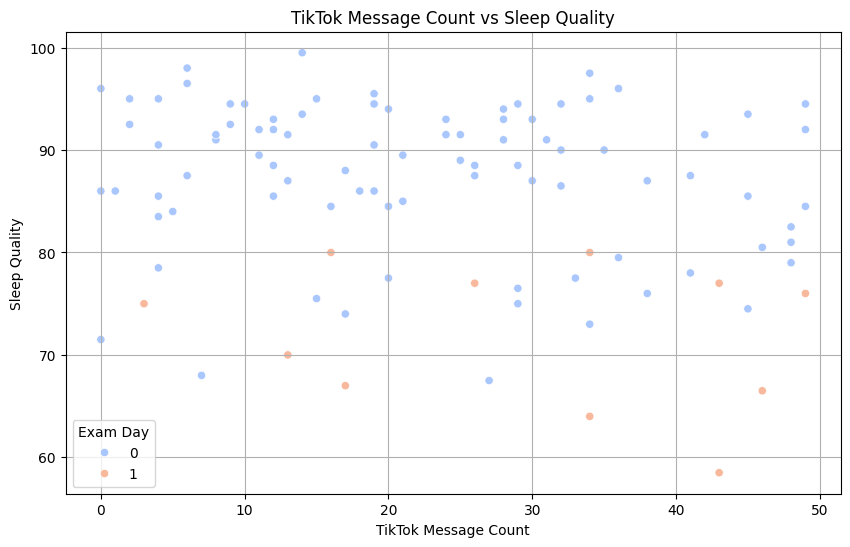

In [ ]:
# TikTok Message Count vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TikTok_Message_Count', y='Sleep_Quality', hue='Exam_Day', palette='coolwarm')
plt.title("TikTok Message Count vs Sleep Quality")
plt.xlabel("TikTok Message Count")
plt.ylabel("Sleep Quality")
plt.legend(title="Exam Day")
plt.grid()
plt.show()

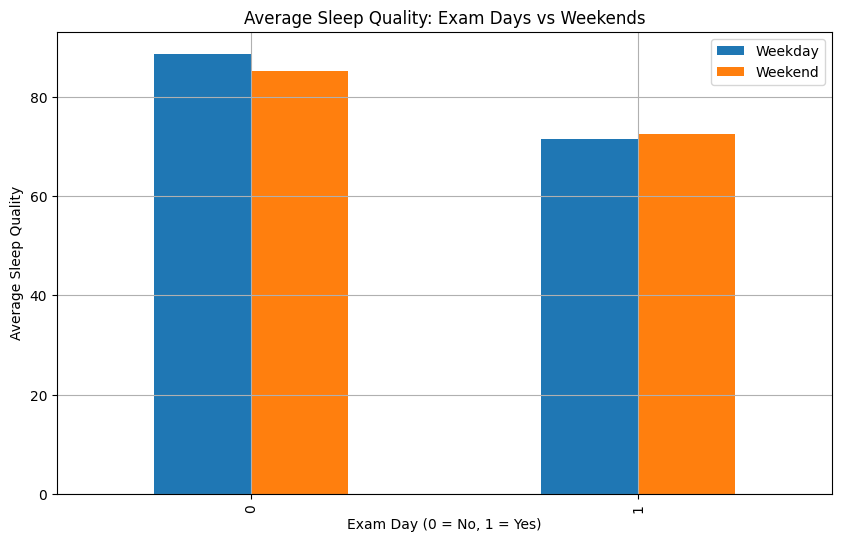

In [ ]:
# Haftasonu sütununu ekleyin
data['Is_Weekend'] = data['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# Exam Day ve Weekend gruplarına göre ortalama uyku kalitesi
grouped_quality = data.groupby(['Exam_Day', 'Is_Weekend'])['Sleep_Quality'].mean().unstack()

# Bar plot
grouped_quality.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Average Sleep Quality: Exam Days vs Weekends")
plt.xlabel("Exam Day (0 = No, 1 = Yes)")
plt.ylabel("Average Sleep Quality")
plt.legend(["Weekday", "Weekend"])
plt.grid()
plt.show()

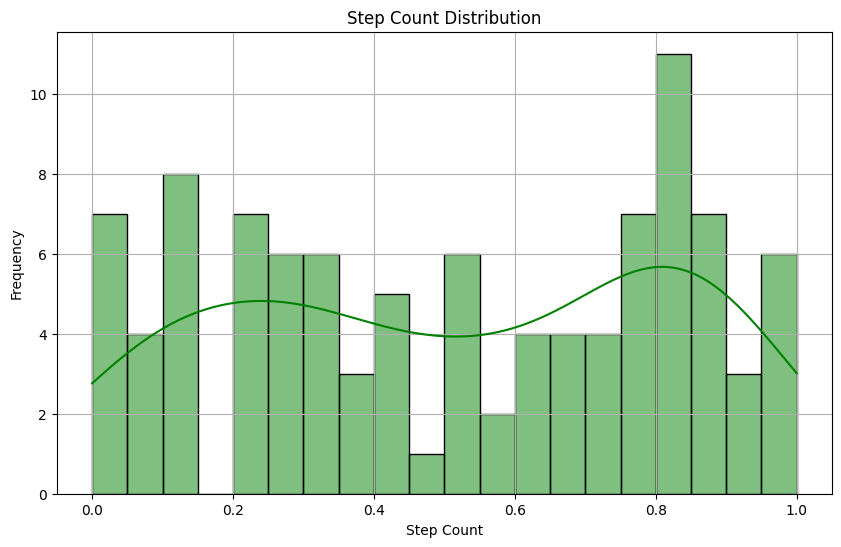

In [ ]:
# Adım sayısının dağılımını gösteren histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Step_Count'], bins=20, kde=True, color='green')
plt.title("Step Count Distribution")
plt.xlabel("Step Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()

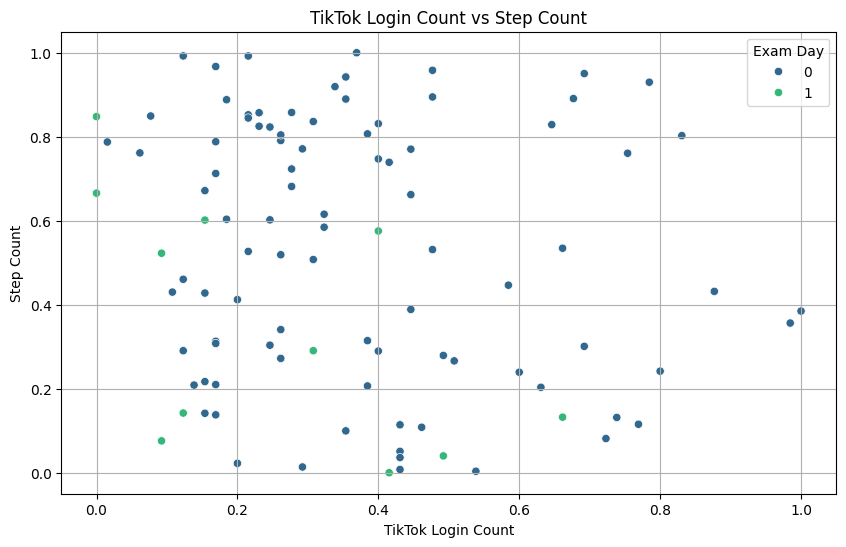

In [ ]:
# TikTok Login Count vs Step Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TikTok_Login_Count', y='Step_Count', hue='Exam_Day', palette='viridis')
plt.title("TikTok Login Count vs Step Count")
plt.xlabel("TikTok Login Count")
plt.ylabel("Step Count")
plt.legend(title="Exam Day")
plt.grid()
plt.show()

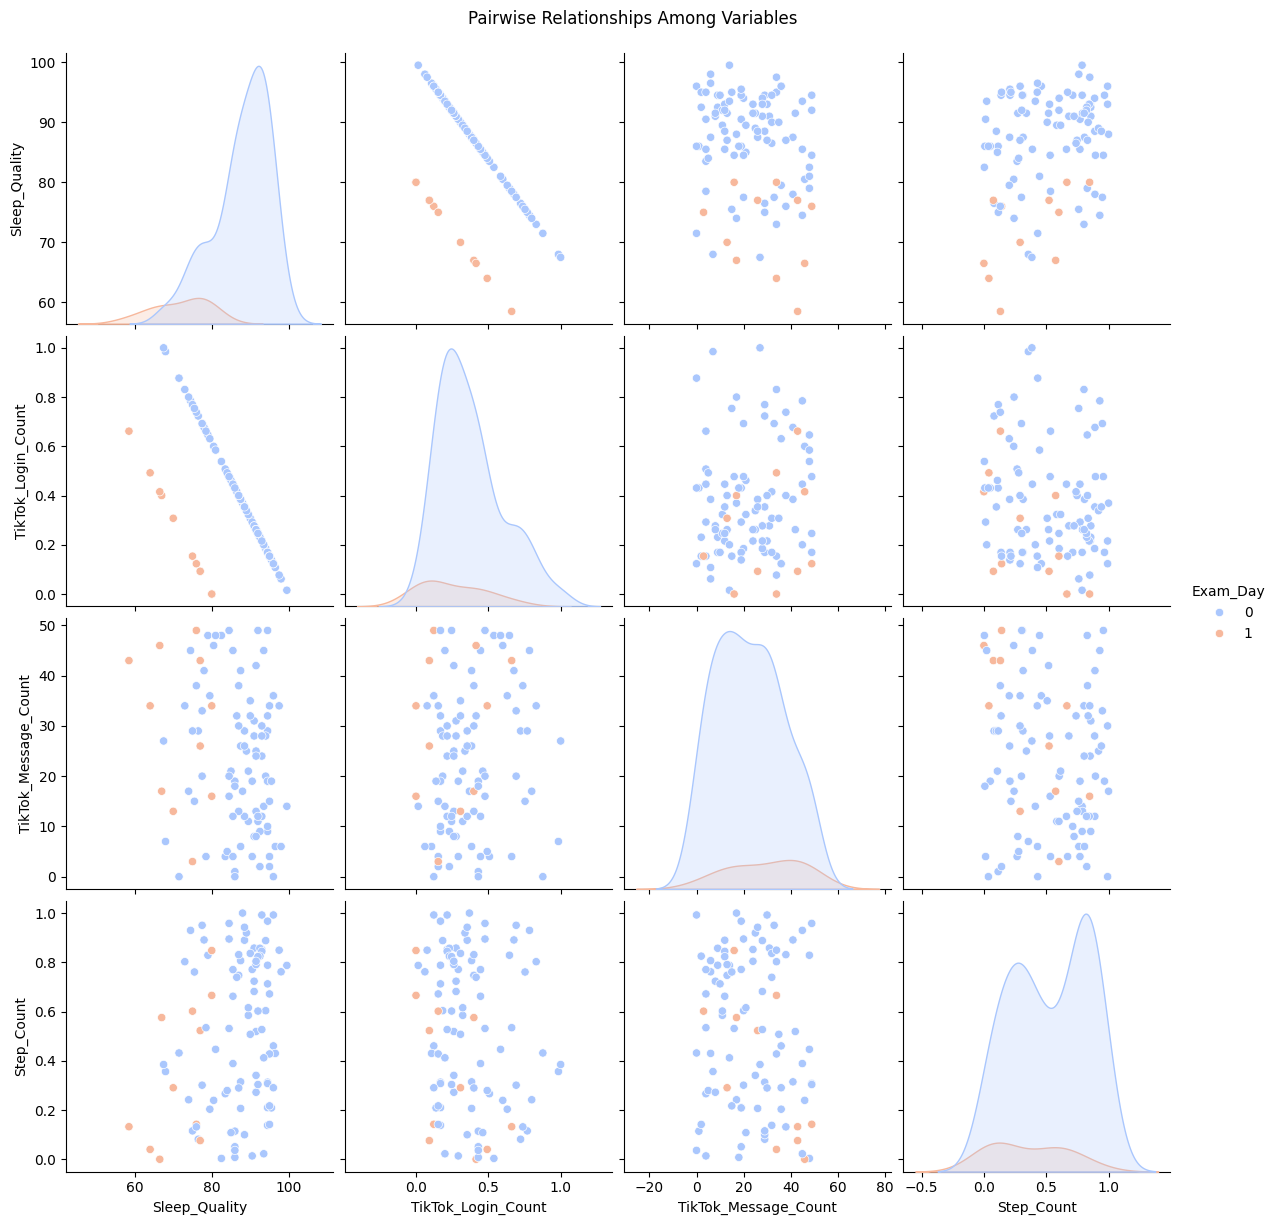

In [ ]:
# Pairwise relationships among variables
sns.pairplot(data, vars=['Sleep_Quality', 'TikTok_Login_Count', 'TikTok_Message_Count', 'Step_Count'], hue='Exam_Day', palette='coolwarm', height=3)
plt.suptitle("Pairwise Relationships Among Variables", y=1.02)
plt.show()

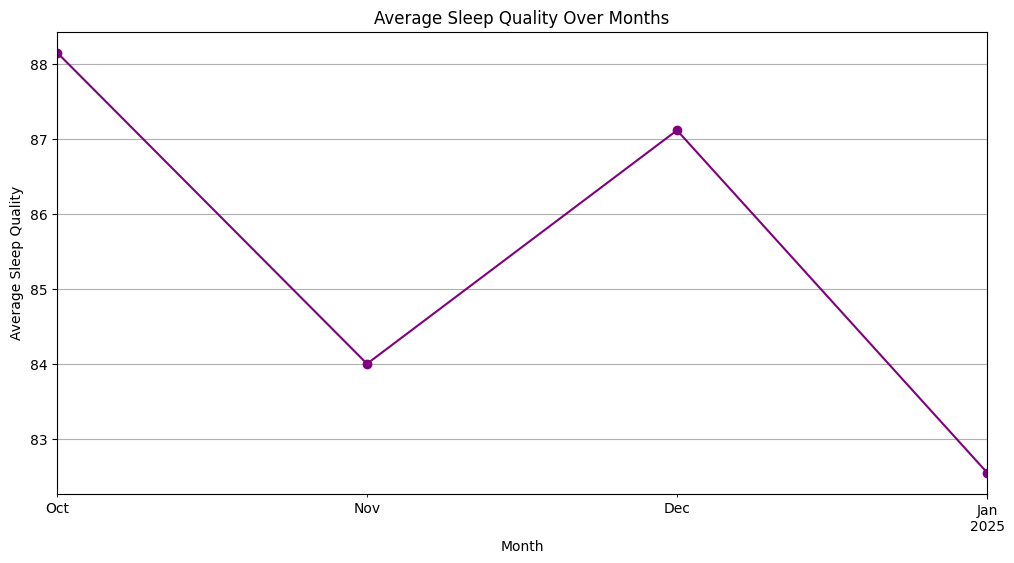

In [ ]:
# Aylık uyku kalitesi ortalamaları
monthly_avg_sleep_quality = data.groupby(data['Date'].dt.to_period("M"))['Sleep_Quality'].mean()

# Zaman serisi
monthly_avg_sleep_quality.plot(kind='line', marker='o', figsize=(12, 6), color='purple')
plt.title("Average Sleep Quality Over Months")
plt.xlabel("Month")
plt.ylabel("Average Sleep Quality")
plt.grid()
plt.show()

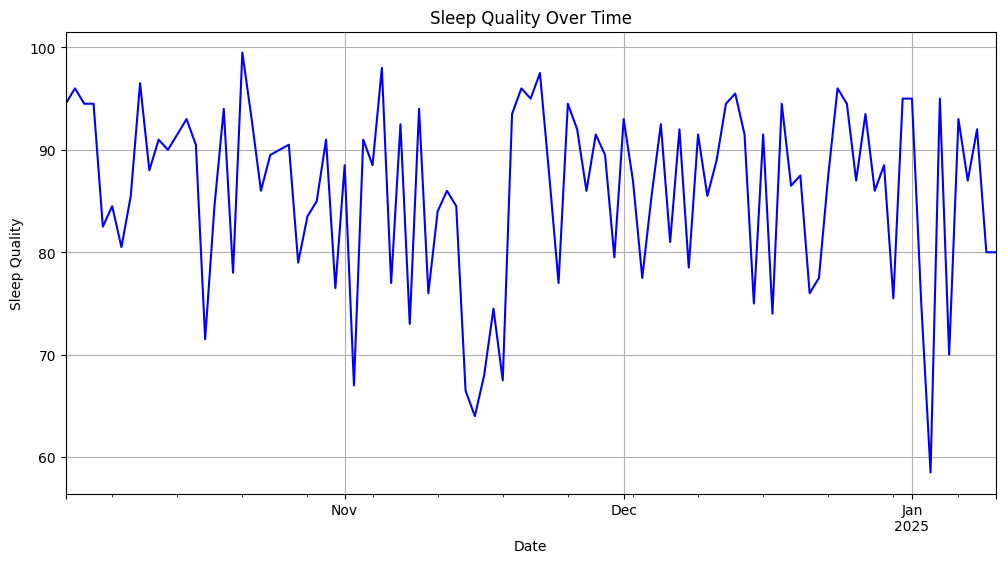

In [ ]:
# Veriyi zaman serisi formatında düzenleyin
data = data.set_index('Date')
time_series = data['Sleep_Quality']

# Zaman serisini inceleyin
time_series.plot(figsize=(12, 6), title="Sleep Quality Over Time", color='blue', grid=True)
plt.ylabel("Sleep Quality")
plt.show()

In [ ]:
# Exponential Smoothing modelini oluştur ve eğit
model = ExponentialSmoothing(time_series, seasonal=None, trend="additive", seasonal_periods=None)
fit_model = model.fit()

# Modelin özetini inceleyin
print(fit_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:            Sleep_Quality   No. Observations:                  101
Model:             ExponentialSmoothing   SSE                           7577.728
Optimized:                         True   AIC                            444.103
Trend:                         Additive   BIC                            454.563
Seasonal:                          None   AICC                           444.996
Seasonal Periods:                  None   Date:                 Fri, 10 Jan 2025
Box-Cox:                          False   Time:                         16:32:03
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.5071e-08                alpha                 True
smoothing_trend             0.0000

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Gelecek 60 gün için tahmin yap
future_dates = pd.date_range(start=time_series.index[-1], periods=60, freq='D')
future_forecast = fit_model.forecast(steps=60)

# Tahmin edilen değerleri bir DataFrame'e ekle
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sleep_Quality': future_forecast})
forecast_df = forecast_df.set_index('Date')

# Tahminleri görüntüle
forecast_df.head()

,Predicted_Sleep_Quality
Date,
2025-01-10,84.460596
2025-01-11,84.429537
2025-01-12,84.398478
2025-01-13,84.367419
2025-01-14,84.336360


In [ ]:
# Mevcut ve tahmin verilerini birleştir
combined_df = pd.concat([time_series, forecast_df], axis=1, keys=['Observed', 'Forecasted'])

# Birleştirilmiş veriyi görüntüle
combined_df.tail()


,Observed,Forecasted
,Sleep_Quality,Predicted_Sleep_Quality
Date,,
2025-03-06,NaN,82.752350
2025-03-07,NaN,82.721291
2025-03-08,NaN,82.690232
2025-03-09,NaN,82.659173
2025-03-10,NaN,82.628114


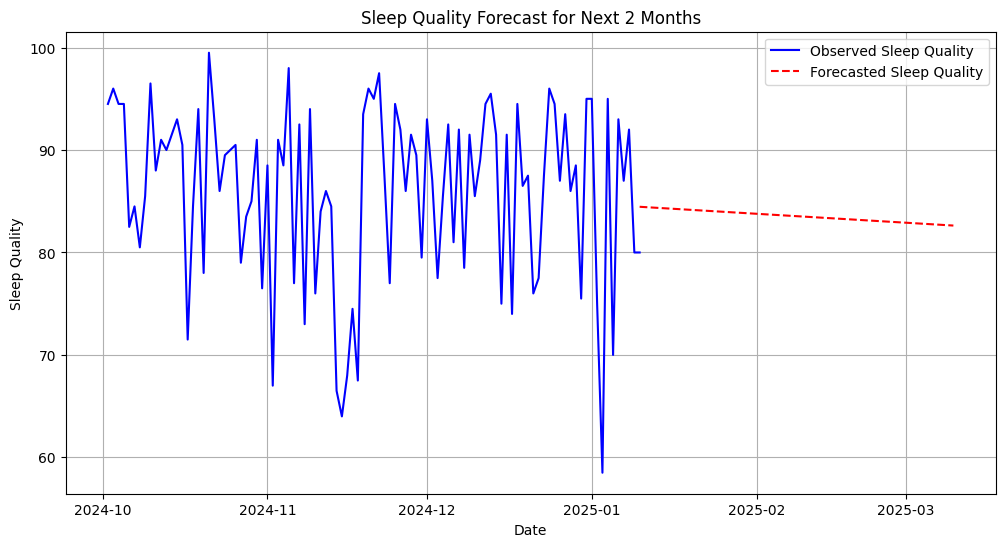

In [ ]:
# Tahminleri görselleştir
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Observed'], label='Observed Sleep Quality', color='blue')
plt.plot(combined_df.index, combined_df['Forecasted'], label='Forecasted Sleep Quality', color='red', linestyle='--')
plt.title("Sleep Quality Forecast for Next 2 Months")
plt.xlabel("Date")
plt.ylabel("Sleep Quality")
plt.legend()
plt.grid()
plt.show()